# Explore Json

Use this notebook to explore  candle data from Oanda.

In [29]:
# Imports
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf

from datetime import datetime

%matplotlib inline

In [30]:
with open('../dump/XAU_USD-H1-candles.json') as f:
    raw_json_data = f.read()

json_data = json.loads(raw_json_data)

instrument = json_data['instrument']
granularity = json_data['granularity']
candles = json_data['candles']

print(f"{instrument} ({granularity}) candles")
print(f"Sample candle data: {candles[0]}")

XAU_USD (H1) candles
Sample candle data: {'complete': True, 'volume': 23924, 'time': '2022-04-25T07:00:00.000000000Z', 'mid': {'o': '1917.910', 'h': '1921.120', 'l': '1914.795', 'c': '1915.605'}}


In [31]:
#candles
# candles
#c = candles[0]


# # 2022-04-21T20:00:00.000000000Z
# #
# from datetime import datetime
# a = datetime.strptime(c['time'], "%Y-%m-%dT%H:%M:%S.%f000Z")
# a

In [32]:
# Convert json data to dataframe
flatten_data = [
    [ 
        datetime.strptime(x['time'], "%Y-%m-%dT%H:%M:%S.%f000Z"), 
        bool(x['complete']), 
        int(x['volume']), 
        float(x['mid']['o']), 
        float(x['mid']['h']), 
        float(x['mid']['l']), 
        float(x['mid']['c'])
    ] for x in candles]
df = pd.DataFrame(
    flatten_data, 
    columns=['time','complete', 'volume', 'o', 'h', 'l', 'c'])

print(f"df shape: {df.shape}")

print(df.info())


df shape: (500, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   time      500 non-null    datetime64[ns]
 1   complete  500 non-null    bool          
 2   volume    500 non-null    int64         
 3   o         500 non-null    float64       
 4   h         500 non-null    float64       
 5   l         500 non-null    float64       
 6   c         500 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(4), int64(1)
memory usage: 24.1 KB
None


In [33]:
#df['ma'] = df.rolling(5,on='pop').mean()
#print(df.to_string())
df['ma'] = df['c'].rolling(8).mean()
df['ewm'] = df['c'].ewm(span=4, adjust=False).mean()
df.head(30)

,time,complete,volume,o,h,l,c,ma,ewm
0,2022-04-25 07:00:00,True,23924,1917.910,1921.120,1914.795,1915.605,NaN,1915.605000
1,2022-04-25 08:00:00,True,24028,1915.599,1921.247,1914.360,1916.575,NaN,1915.993000
2,2022-04-25 09:00:00,True,15613,1916.620,1919.265,1915.693,1917.310,NaN,1916.519800
3,2022-04-25 10:00:00,True,21081,1917.360,1918.240,1907.737,1908.915,NaN,1913.477880
4,2022-04-25 11:00:00,True,38641,1908.925,1911.075,1905.225,1907.670,NaN,1911.154728
5,2022-04-25 12:00:00,True,63020,1907.685,1909.745,1891.550,1894.790,NaN,1904.608837
6,2022-04-25 13:00:00,True,79297,1894.801,1904.267,1893.628,1896.835,NaN,1901.499302
7,2022-04-25 14:00:00,True,82198,1896.805,1899.449,1891.941,1895.185,1906.610625,1898.973581
8,2022-04-25 15:00:00,True,42415,1895.200,1900.535,1892.767,1895.890,1904.146250,1897.740149
9,2022-04-25 16:00:00,True,24717,1895.905,1897.973,1894.550,1897.755,1901.793750,1897.746089


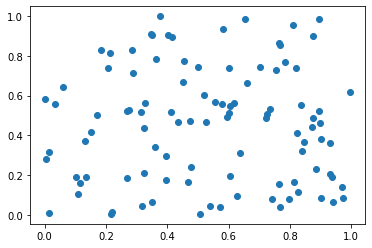

In [34]:

x = np.random.rand(100)
y = np.random.rand(100)
plt.scatter(x, y)
plt.show()

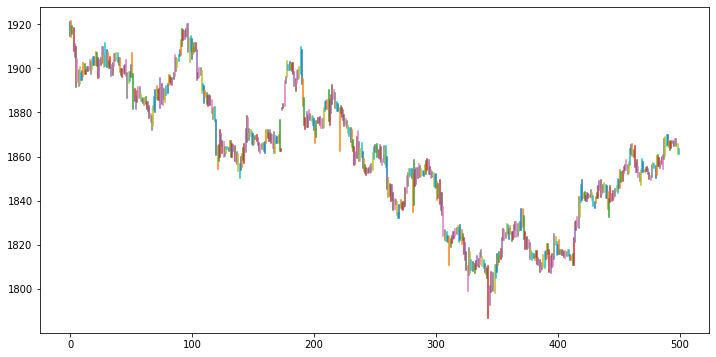

In [37]:
x = np.arange(0,len(df))

fig, ax = plt.subplots(1, figsize=(12,6))

for idx, val in df.iterrows():
    plt.plot([x[idx], x[idx]], [val['l'], val['h']])
    
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
475 time        2022-05-24 01:00:00
complete                   True
volume                    11723
o                      1852.045
h                      1852.423
l                      1849.879
c                      1849.985
ma                     1853.267
ewm                 1851.847171
Name: 475, dtype: object
476 time        2022-05-24 02:00:00
complete                   True
volume                     5638
o                       1849.99
h                        1851.2
l                       1849.37
c                      1850.915
ma                   1852.94325
ewm                 1851.474302
Name: 476, dtype: object
477 time        2022-05-24 03:00:00
complete                   True
volume                     6489
o                      1850.921
h                      1855.975
l                       1850.83
c                      1855.815
ma                  1852.880125
ewm                 1853.210

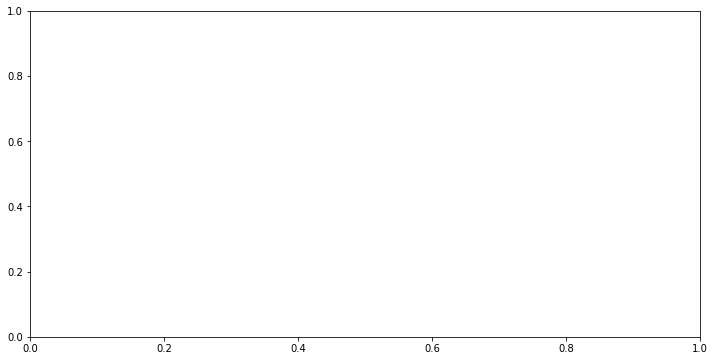

In [58]:
# Plot using the last 25 data points
plt_data = df.tail(25)

x = np.arange(0, len(plt_data))

print(x)

fig, ax = plt.subplots(1, figsize=(12,6))

for idx, val in plt_data.iterrows():
    print(idx, val)

# for idx, val in plt_data.iterrows():
#     plt.plot([x[idx], x[idx]], [val['l'], val['h']])
    
# plt.show()